In [250]:
#importing packages
import pandas as pd # linear algebra
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
# plt.style.use('ggplot')
sns.set_style("dark")

## Importing, Cleansing, and Understanding the Data

In [251]:
# https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_5050split_health_indicators_BRFSS2015.csv
# https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf # This is the original source and code book for the data.

In [252]:
# Importing CSV files
df1 = pd.read_csv(r'C:\Users\johno\Downloads\Project\diabetes_012_health_indicators_BRFSS2015.csv',  engine='python')
df2 = pd.read_csv(r'C:\Users\johno\Downloads\Project\diabetes_binary_5050split_health_indicators_BRFSS2015.csv',  engine='python')
df3 = pd.read_csv(r'C:\Users\johno\Downloads\Project\diabetes_binary_health_indicators_BRFSS2015.csv',  engine='python')

### Preliminary investigation and cleaning of data

In [253]:
df1.shape

(253680, 22)

In [254]:
df2.shape

(70692, 22)

In [255]:
df3.shape

(253680, 22)

In [256]:
df1.columns # Looking at column names for merging

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [257]:
df2.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [258]:
df3.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [103]:
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [104]:
 # Changing column name to allow for concatenation.
df1 = df1.rename(columns={'Diabetes_012':'Diabetes_binary'})

In [105]:
df1.head() # Checking column name change

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [193]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
578047     True
578048     True
578049     True
578050     True
578051     True
Length: 578052, dtype: bool

In [106]:
df2.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [107]:
df3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### Main dataframe creating with .concat

#### Preliminary investigation and manipulation of main dataframe 'df'.

In [108]:
df=pd.concat([df1, df2, df3], ignore_index=True) # Using concat to combine dataframes

In [198]:
df.shape # checking shape is correct after pd.concat

(578052, 24)

In [196]:
df[df.duplicated()] # checking for duplicates

,Has Diabetes,HighBP,High Chol,Recent Chol Check,BMI,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,...,Gen Health,Mental Health,Physical Health,Difficulty Walking,Gender,Age,Education,Income,BMI Category,Age Category
1242,2.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0,Overweight,65 - 69
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0,Healthy Weight,35 - 39
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0,Obese,40 - 44
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0,Healthy Weight,35 - 39
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0,Healthy Weight,60 - 64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578047,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,Severely Obese,40 - 44
578048,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,Underweight,70 - 74
578049,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,Overweight,25 - 29
578050,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,Healthy Weight,50 - 54


In [199]:
df.drop_duplicates() # dropping duplicates as necessary

,Has Diabetes,HighBP,High Chol,Recent Chol Check,BMI,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,...,Gen Health,Mental Health,Physical Health,Difficulty Walking,Gender,Age,Education,Income,BMI Category,Age Category
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,Severely Obese,60 - 64
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,Overweight,50 - 54
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,Overweight,60 - 64
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,Overweight,70 - 74
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,Healthy Weight,70 - 74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577880,0.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,...,4.0,0.0,10.0,0.0,0.0,11.0,3.0,1.0,Overweight,70 - 74
577900,0.0,1.0,0.0,1.0,34.0,0.0,0.0,0.0,1.0,1.0,...,3.0,0.0,6.0,0.0,0.0,4.0,5.0,4.0,Obese,35 - 39
577901,0.0,1.0,0.0,1.0,32.0,1.0,0.0,0.0,1.0,0.0,...,2.0,0.0,2.0,0.0,1.0,9.0,6.0,7.0,Obese,60 - 64
578036,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,6.0,6.0,4.0,Overweight,45 - 49


In [200]:
df.shape

(578052, 24)

In [109]:
df.head(15) 

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [197]:
df.shape

(578052, 24)

In [111]:
df.info() # Basic info on the dataframe, shows column names which I will now change.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578052 entries, 0 to 578051
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       578052 non-null  float64
 1   HighBP                578052 non-null  float64
 2   HighChol              578052 non-null  float64
 3   CholCheck             578052 non-null  float64
 4   BMI                   578052 non-null  float64
 5   Smoker                578052 non-null  float64
 6   Stroke                578052 non-null  float64
 7   HeartDiseaseorAttack  578052 non-null  float64
 8   PhysActivity          578052 non-null  float64
 9   Fruits                578052 non-null  float64
 10  Veggies               578052 non-null  float64
 11  HvyAlcoholConsump     578052 non-null  float64
 12  AnyHealthcare         578052 non-null  float64
 13  NoDocbcCost           578052 non-null  float64
 14  GenHlth               578052 non-null  float64
 15  

In [112]:
# Renaming columns as necessary
df = df.rename(columns={'Diabetes_binary': 'Has Diabetes','HighChol': 'High Chol', 'CholCheck': 'Recent Chol Check',
        'HeartDiseaseorAttack': 'Heart Attack/Disease', 'PhysActivity': 'Physically Active', 
        'Fruits': 'Fruit Consump', 'Veggies': 'Veg Consump',
        'HvyAlcoholConsump': 'High Alcohol Consump', 'AnyHealthcare': 'Has Healthcare', 
        'NoDocbcCost': 'Avoid Dr. Cost', 'GenHlth': 'Gen Health',
        'MentHlth': 'Mental Health', 'PhysHlth': 'Physical Health', 'DiffWalk': 'Difficulty Walking', 'Sex':'Gender'})

In [113]:
df.info()  # Shows changed names.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578052 entries, 0 to 578051
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Has Diabetes          578052 non-null  float64
 1   HighBP                578052 non-null  float64
 2   High Chol             578052 non-null  float64
 3   Recent Chol Check     578052 non-null  float64
 4   BMI                   578052 non-null  float64
 5   Smoker                578052 non-null  float64
 6   Stroke                578052 non-null  float64
 7   Heart Attack/Disease  578052 non-null  float64
 8   Physically Active     578052 non-null  float64
 9   Fruit Consump         578052 non-null  float64
 10  Veg Consump           578052 non-null  float64
 11  High Alcohol Consump  578052 non-null  float64
 12  Has Healthcare        578052 non-null  float64
 13  Avoid Dr. Cost        578052 non-null  float64
 14  Gen Health            578052 non-null  float64
 15  

In [114]:
df.columns # Again, shows changed names.

Index(['Has Diabetes', 'HighBP', 'High Chol', 'Recent Chol Check', 'BMI',
       'Smoker', 'Stroke', 'Heart Attack/Disease', 'Physically Active',
       'Fruit Consump', 'Veg Consump', 'High Alcohol Consump',
       'Has Healthcare', 'Avoid Dr. Cost', 'Gen Health', 'Mental Health',
       'Physical Health', 'Difficulty Walking', 'Gender', 'Age', 'Education',
       'Income'],
      dtype='object')

In [115]:
df.dtypes

Has Diabetes            float64
HighBP                  float64
High Chol               float64
Recent Chol Check       float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Heart Attack/Disease    float64
Physically Active       float64
Fruit Consump           float64
Veg Consump             float64
High Alcohol Consump    float64
Has Healthcare          float64
Avoid Dr. Cost          float64
Gen Health              float64
Mental Health           float64
Physical Health         float64
Difficulty Walking      float64
Gender                  float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [116]:
df.isnull().sum() # There are no null values in this dataset

Has Diabetes            0
HighBP                  0
High Chol               0
Recent Chol Check       0
BMI                     0
Smoker                  0
Stroke                  0
Heart Attack/Disease    0
Physically Active       0
Fruit Consump           0
Veg Consump             0
High Alcohol Consump    0
Has Healthcare          0
Avoid Dr. Cost          0
Gen Health              0
Mental Health           0
Physical Health         0
Difficulty Walking      0
Gender                  0
Age                     0
Education               0
Income                  0
dtype: int64

In [117]:
df.count() # again showing no null values as df.shape is (578052, 22)

Has Diabetes            578052
HighBP                  578052
High Chol               578052
Recent Chol Check       578052
BMI                     578052
Smoker                  578052
Stroke                  578052
Heart Attack/Disease    578052
Physically Active       578052
Fruit Consump           578052
Veg Consump             578052
High Alcohol Consump    578052
Has Healthcare          578052
Avoid Dr. Cost          578052
Gen Health              578052
Mental Health           578052
Physical Health         578052
Difficulty Walking      578052
Gender                  578052
Age                     578052
Education               578052
Income                  578052
dtype: int64

In [422]:
df.describe().T # View of some numerical stats for each column (pivoted)

,count,mean,std,min,25%,50%,75%,max
Has Diabetes,578052.0,0.252598,0.557751,0.0,0.00,0.0,0.0,2.0
HighBP,578052.0,0.445444,0.497015,0.0,0.00,0.0,1.0,1.0
High Chol,578052.0,0.436544,0.495957,0.0,0.00,0.0,1.0,1.0
Recent Chol Check,578052.0,0.964209,0.185769,0.0,1.00,1.0,1.0,1.0
BMI,578052.0,28.562700,6.689993,12.0,24.00,27.0,32.0,98.0
Smoker,578052.0,0.447095,0.497194,0.0,0.00,0.0,1.0,1.0
Stroke,578052.0,0.043212,0.203335,0.0,0.00,0.0,0.0,1.0
Heart Attack/Disease,578052.0,0.100744,0.300989,0.0,0.00,0.0,0.0,1.0
Physically Active,578052.0,0.750000,0.433013,0.0,0.75,1.0,1.0,1.0
Fruit Consump,578052.0,0.631509,0.482396,0.0,0.00,1.0,1.0,1.0


In [119]:
df.head() #  First 5 rows

,Has Diabetes,HighBP,High Chol,Recent Chol Check,BMI,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,...,Has Healthcare,Avoid Dr. Cost,Gen Health,Mental Health,Physical Health,Difficulty Walking,Gender,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [120]:
df.tail() # Last 5 rows

,Has Diabetes,HighBP,High Chol,Recent Chol Check,BMI,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,...,Has Healthcare,Avoid Dr. Cost,Gen Health,Mental Health,Physical Health,Difficulty Walking,Gender,Age,Education,Income
578047,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
578048,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
578049,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
578050,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
578051,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [122]:
df.loc[253678] # How to look at a specific row.

Has Diabetes             0.0
HighBP                   1.0
High Chol                0.0
Recent Chol Check        1.0
BMI                     23.0
Smoker                   0.0
Stroke                   0.0
Heart Attack/Disease     0.0
Physically Active        0.0
Fruit Consump            1.0
Veg Consump              1.0
High Alcohol Consump     0.0
Has Healthcare           1.0
Avoid Dr. Cost           0.0
Gen Health               3.0
Mental Health            0.0
Physical Health          0.0
Difficulty Walking       0.0
Gender                   1.0
Age                      7.0
Education                5.0
Income                   1.0
Name: 253678, dtype: float64

In [259]:
df.corr() # looking at correlations

,Has Diabetes,HighBP,High Chol,Recent Chol Check,BMI,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,...,Has Healthcare,Avoid Dr. Cost,Gen Health,Mental Health,Physical Health,Difficulty Walking,Gender,Age,Education,Income
Has Diabetes,1.000000,0.276378,0.211863,0.070125,0.226284,0.064052,0.107194,0.179984,-0.123355,-0.042750,...,0.016397,0.034432,0.306193,0.072959,0.176398,0.224308,0.032305,0.189482,-0.131403,-0.172664
HighBP,0.276378,1.000000,0.304553,0.100368,0.222229,0.097292,0.131676,0.213076,-0.129629,-0.041779,...,0.038484,0.019465,0.309136,0.059420,0.166983,0.229817,0.051578,0.346956,-0.144486,-0.177309
High Chol,0.211863,0.304553,1.000000,0.086779,0.114244,0.092752,0.095526,0.183646,-0.082123,-0.042597,...,0.041256,0.016601,0.217288,0.066461,0.127917,0.151076,0.030156,0.271433,-0.075178,-0.091735
Recent Chol Check,0.070125,0.100368,0.086779,1.000000,0.037088,-0.008860,0.024503,0.044964,0.001930,0.022785,...,0.116524,-0.058282,0.049749,-0.008030,0.033123,0.042265,-0.020374,0.092491,-0.000527,0.012237
BMI,0.226284,0.222229,0.114244,0.037088,1.000000,0.014995,0.023009,0.057983,-0.152955,-0.087966,...,-0.017344,0.059908,0.248368,0.089582,0.130734,0.208430,0.038123,-0.032364,-0.106149,-0.107040
Smoker,0.064052,0.097292,0.092752,-0.008860,0.014995,1.000000,0.062219,0.116645,-0.087168,-0.077608,...,-0.021893,0.047482,0.163028,0.092502,0.117915,0.123118,0.096143,0.119870,-0.159988,-0.122425
Stroke,0.107194,0.131676,0.095526,0.024503,0.023009,0.062219,1.000000,0.208056,-0.072035,-0.013236,...,0.008625,0.035337,0.181835,0.073618,0.153128,0.181068,0.003474,0.127774,-0.076944,-0.131277
Heart Attack/Disease,0.179984,0.213076,0.183646,0.044964,0.057983,0.116645,0.208056,1.000000,-0.091006,-0.020552,...,0.018564,0.032326,0.264665,0.067528,0.187143,0.219237,0.088135,0.223457,-0.101234,-0.144480
Physically Active,-0.123355,-0.129629,-0.082123,0.001930,-0.152955,-0.087168,-0.072035,-0.091006,1.000000,0.142053,...,0.034165,-0.062269,-0.269640,-0.127070,-0.223157,-0.258580,0.034496,-0.095597,0.199782,0.200057
Fruit Consump,-0.042750,-0.041779,-0.042597,0.022785,-0.087966,-0.077608,-0.013236,-0.020552,0.142053,1.000000,...,0.031187,-0.044612,-0.104178,-0.067718,-0.045937,-0.049608,-0.091022,0.063094,0.109250,0.080522


### Has Diabetes column

In [437]:
df['Has Diabetes'].value_counts() # Shows counts for each value in column

0.0    467383
1.0     75323
2.0     35346
Name: Has Diabetes, dtype: int64

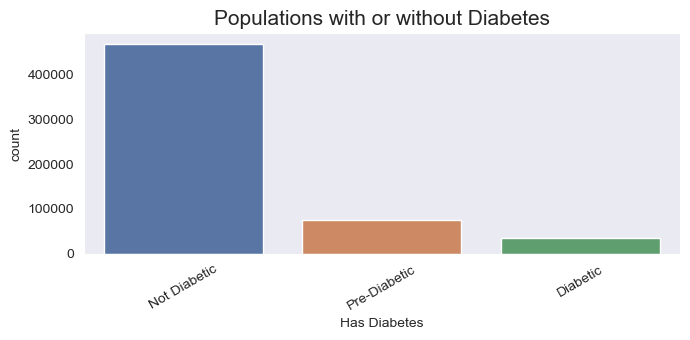

In [438]:
g = sns.countplot(data=df, x='Has Diabetes', palette='deep')
g.set_xticklabels(['Not Diabetic','Pre-Diabetic','Diabetic'])
plt.xticks(rotation=30)
plt.tight_layout()
plt.title('Populations with or without Diabetes', size=15)
plt.show()

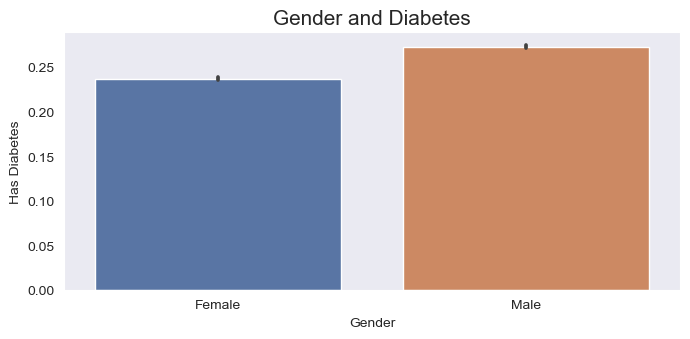

In [439]:
g = sns.barplot(x='Gender',y='Has Diabetes',data=df, palette='deep')
g.set_xticklabels(['Female','Male'])
plt.title('Gender and Diabetes', size=15)
plt.show()

### Analysis of BMI Column

In [124]:
df['BMI'] # Look at a specific column, BMI

0         40.0
1         25.0
2         28.0
3         27.0
4         24.0
          ... 
578047    45.0
578048    18.0
578049    28.0
578050    23.0
578051    25.0
Name: BMI, Length: 578052, dtype: float64

In [125]:
#  Choosing stats for BMI column
df['BMI'].agg([np.min, np.max, np.mean, np.median, np.std]) 

amin      12.000000
amax      98.000000
mean      28.562700
median    27.000000
std        6.689993
Name: BMI, dtype: float64

In [260]:
df.groupby(df.BMI).mean()

,Has Diabetes,HighBP,High Chol,Recent Chol Check,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,Veg Consump,...,Has Healthcare,Avoid Dr. Cost,Gen Health,Mental Health,Physical Health,Difficulty Walking,Gender,Age,Education,Income
BMI,,,,,,,,,,,,,,,,,,,,,
12.0,0.000000,0.000000,0.153846,1.000000,0.538462,0.000000,0.153846,0.692308,0.461538,0.461538,...,0.846154,0.307692,2.769231,9.307692,4.769231,0.461538,0.538462,9.307692,4.923077,5.153846
13.0,0.180000,0.200000,0.340000,1.000000,0.540000,0.000000,0.060000,0.680000,0.460000,0.760000,...,0.920000,0.180000,3.460000,6.220000,9.640000,0.400000,0.520000,7.880000,4.800000,4.580000
14.0,0.188889,0.311111,0.288889,0.977778,0.655556,0.055556,0.211111,0.611111,0.611111,0.766667,...,0.933333,0.111111,3.222222,3.044444,12.166667,0.455556,0.455556,9.344444,4.366667,4.511111
15.0,0.163265,0.387755,0.309524,0.965986,0.581633,0.129252,0.136054,0.544218,0.527211,0.741497,...,0.914966,0.108844,3.238095,6.221088,10.479592,0.350340,0.265306,9.159864,4.663265,4.887755
16.0,0.107050,0.374674,0.298956,0.946475,0.588773,0.101828,0.152742,0.621410,0.603133,0.753264,...,0.937337,0.135770,3.049608,5.344648,8.642298,0.314621,0.258486,8.672324,4.800261,4.744125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,3.000000,1.000000,0.000000,10.000000,5.000000,4.000000
92.0,0.273973,0.410959,0.520548,1.000000,0.273973,0.027397,0.109589,0.698630,0.684932,0.753425,...,0.876712,0.123288,2.465753,4.753425,4.438356,0.164384,0.041096,7.246575,5.123288,5.835616
95.0,0.142857,0.428571,0.857143,0.892857,0.642857,0.000000,0.071429,0.357143,0.464286,0.750000,...,0.857143,0.071429,2.642857,6.000000,14.285714,0.535714,0.000000,6.678571,4.750000,5.821429


In [127]:
df.nunique() #  Shows number of unique values for each column

Has Diabetes             3
HighBP                   2
High Chol                2
Recent Chol Check        2
BMI                     84
Smoker                   2
Stroke                   2
Heart Attack/Disease     2
Physically Active        2
Fruit Consump            2
Veg Consump              2
High Alcohol Consump     2
Has Healthcare           2
Avoid Dr. Cost           2
Gen Health               5
Mental Health           31
Physical Health         31
Difficulty Walking       2
Gender                   2
Age                     13
Education                6
Income                   8
dtype: int64

In [128]:
df['BMI'].nunique() # How many BMI Unique values

84

In [425]:
df['BMI'].unique() # Show the values

array([40., 25., 28., 27., 24., 30., 34., 26., 33., 21., 23., 22., 38.,
       32., 37., 31., 29., 20., 35., 45., 39., 19., 47., 18., 36., 43.,
       55., 49., 42., 17., 16., 41., 44., 50., 59., 48., 52., 46., 54.,
       57., 53., 14., 15., 51., 58., 63., 61., 56., 74., 62., 64., 66.,
       73., 85., 60., 67., 65., 70., 82., 79., 92., 68., 72., 88., 96.,
       13., 81., 71., 75., 12., 77., 69., 76., 87., 89., 84., 95., 98.,
       91., 86., 83., 80., 90., 78.])

In [427]:
df['BMI'].min() # showing minimun value

12.0

In [428]:
df['BMI'].max() # showing maximum value

98.0

In [132]:
df['BMI'].describe() # Some further stats on the column

count    578052.000000
mean         28.562700
std           6.689993
min          12.000000
25%          24.000000
50%          27.000000
75%          32.000000
max          98.000000
Name: BMI, dtype: float64

In [429]:
df[df.BMI < 18.5] # shows the rows of underweight population in dataframe

,Has Diabetes,HighBP,High Chol,Recent Chol Check,BMI,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,...,Difficulty Walking,Gender,Age,Education,Income,BMI Category,Age Category,GenderLabel,Gender Label,Has Diabetes Label
159,0.0,1.0,0.0,1.0,18.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,8.0,6.0,4.0,Underweight,55 - 59,Male,Male,Not Diabetic
168,0.0,0.0,1.0,1.0,18.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,8.0,6.0,7.0,Underweight,55 - 59,Male,Male,Not Diabetic
213,0.0,1.0,0.0,1.0,18.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,4.0,4.0,1.0,Underweight,35 - 39,Male,Male,Not Diabetic
214,0.0,0.0,0.0,1.0,18.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,8.0,3.0,4.0,Underweight,55 - 59,Male,Male,Not Diabetic
221,0.0,1.0,1.0,1.0,17.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,8.0,4.0,7.0,Underweight,55 - 59,Male,Male,Not Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577967,0.0,0.0,0.0,1.0,18.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4.0,1.0,Underweight,18 - 24,Male,Male,Not Diabetic
577991,0.0,0.0,0.0,1.0,18.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,6.0,3.0,Underweight,30 - 34,Male,Male,Not Diabetic
578034,0.0,0.0,0.0,1.0,16.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5.0,6.0,2.0,Underweight,40 - 44,Male,Male,Not Diabetic
578037,0.0,0.0,1.0,1.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,4.0,1.0,Underweight,40 - 44,Male,Male,Not Diabetic


#### BMI	Weight Classifications for camparison analyses
    ##### Below 18.5	    Underweight
    ##### 18.5 – 24.9	   Healthy Weight
    ##### 25.0 – 29.9	   Overweight
    ##### 30.0 – 39.9 	  Obese
    ##### 40.0 and Above    Severely Obese

In [134]:
def categorize_bmi(value):

    """This function takes a BMI value and checks which range it falls in.
    It then returns which category of BMI the given value falls in."""
    
    if value < 18.5:
        return 'Underweight'
    elif value>=18.5 and value<=24.9:
        return 'Healthy Weight'
    elif value>=25.0 and value<=29.9:
        return 'Overweight'
    elif value>=30.0 and value<=39.9:
        return 'Obese'
    elif value>=40.0:
        return 'Severely Obese'
    
    # https://www.cdc.gov/obesity/basics/adult-defining.html

In [135]:
df['BMI Category'] = df.BMI.apply(categorize_bmi) # Creating a new column in df

In [136]:
df.head(1) # To show new column 

,Has Diabetes,HighBP,High Chol,Recent Chol Check,BMI,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,...,Avoid Dr. Cost,Gen Health,Mental Health,Physical Health,Difficulty Walking,Gender,Age,Education,Income,BMI Category
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,Severely Obese


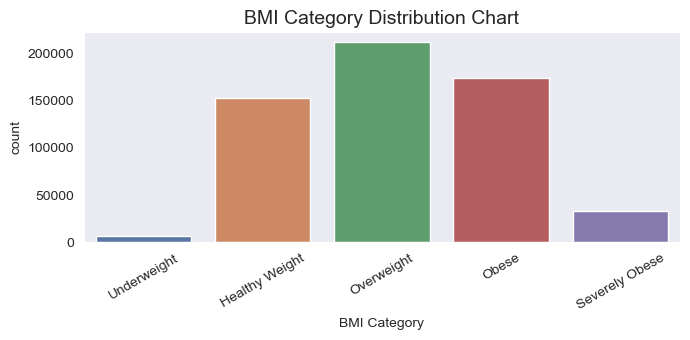

In [202]:
order_list = ['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Severely Obese'] # Using a list to order columns
sns.countplot(data=df, x='BMI Category', order=order_list, palette='deep')
plt.title('BMI Category Distribution Chart', size=14)
plt.xticks(rotation=30)
plt.tight_layout()

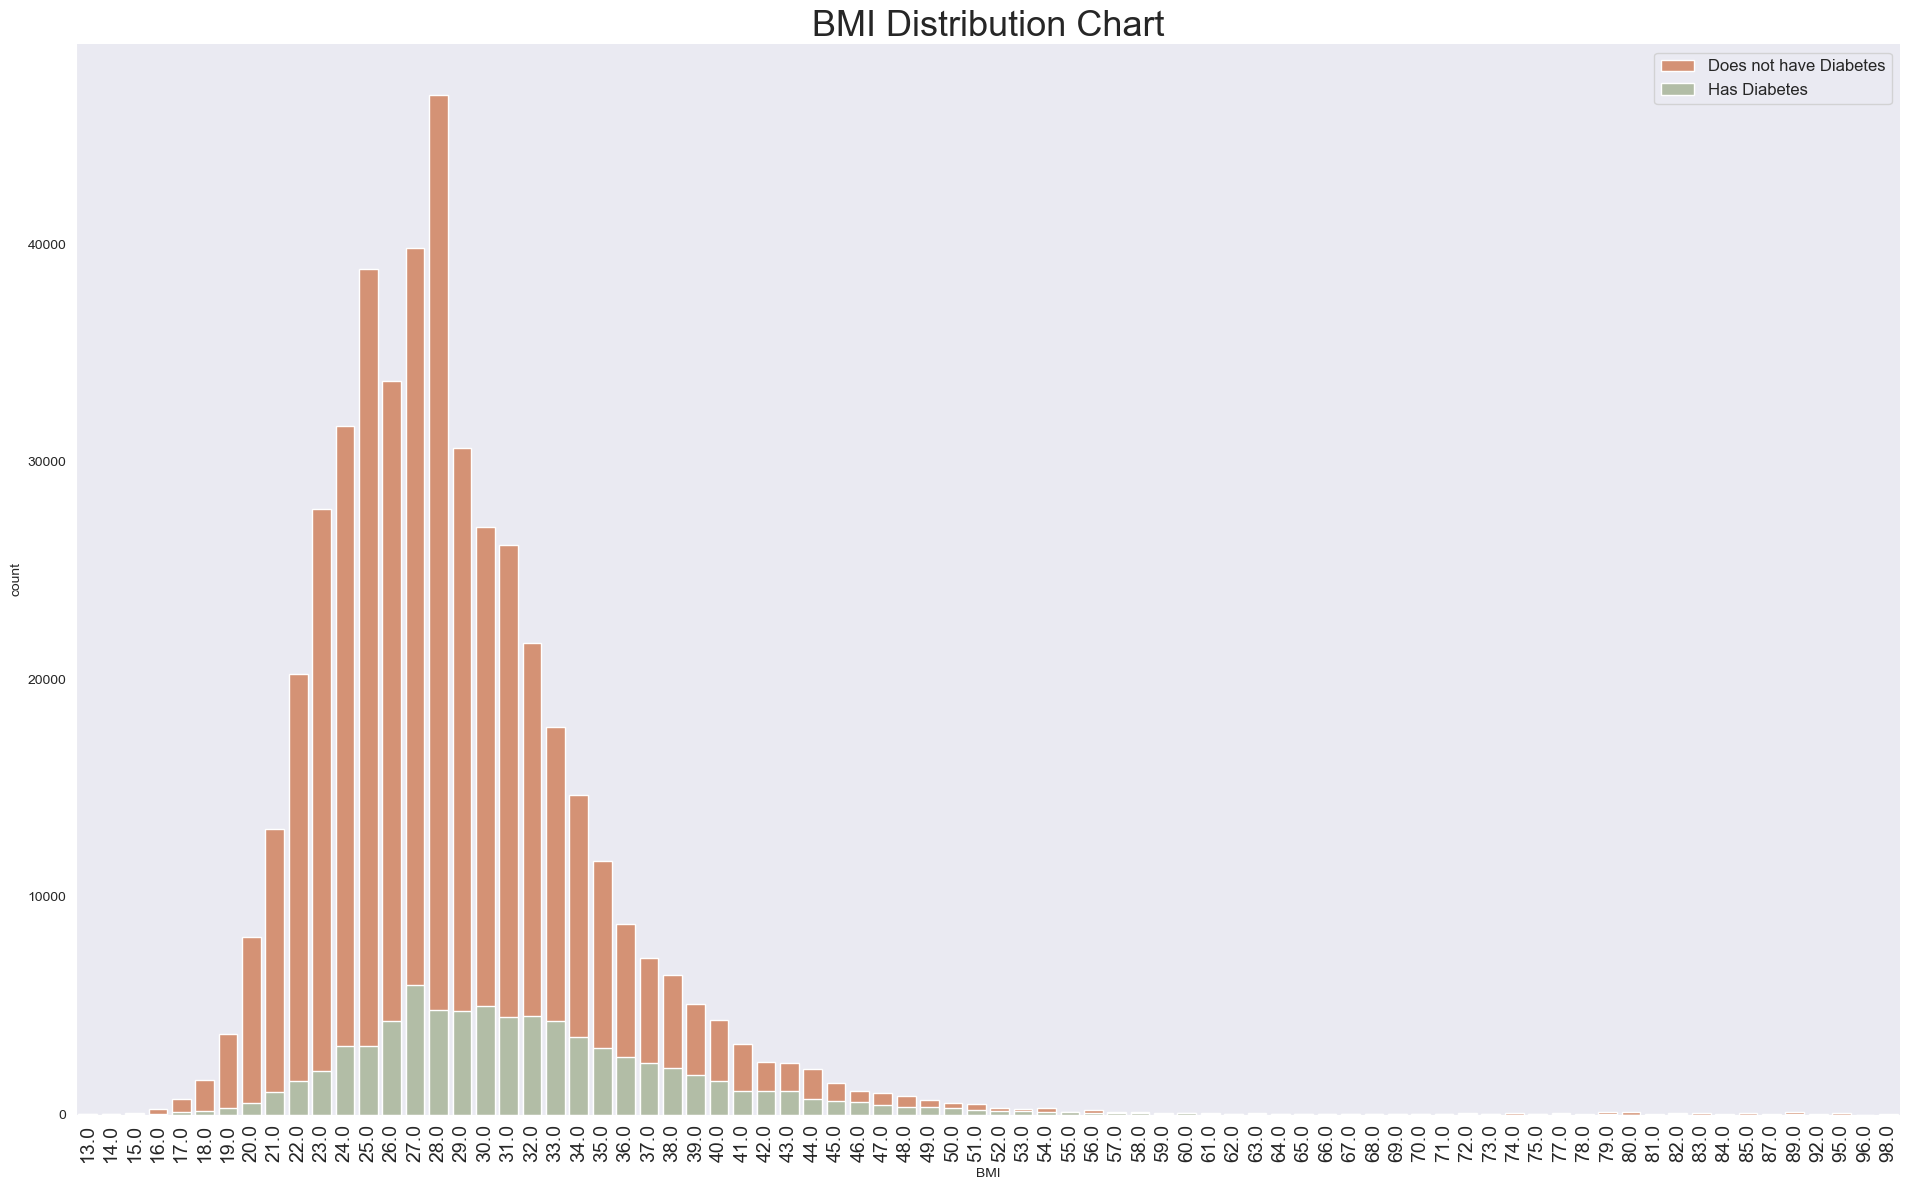

In [208]:
ratio = 12
plt.figure(figsize=(ratio*1.6,ratio))

sns.countplot(x=(df[df['Has Diabetes']==False]['BMI']), color='#e48c65', label='Does not have Diabetes')
sns.countplot(x=(df[df['Has Diabetes']==True]['BMI']), color='#b2c1a2', label='Has Diabetes')
sns.despine()
plt.title('BMI Distribution Chart', size=26)
plt.legend(labels=['Does not have Diabetes','Has Diabetes'], 
           fontsize = 'large', title_fontsize = '14')
plt.xticks(fontsize=14, rotation=90)
plt.tight_layout()

### Analysis of Age

#### Manipulating 'Age' column to allow for more readable graphs and accessible analysis. 

In [141]:
def categorize_age(value):

    """This function takes an Age value and checks which value it equals.
    It then returns the relevant age category."""
    
    if value == 1:
        return "18 - 24"
    elif value == 2:
        return "25 - 29"
    elif value == 3:
        return "30 - 34"
    elif value == 4:
        return "35 - 39"
    elif value == 5:
        return "40 - 44"
    elif value == 6:
        return "45 - 49"
    elif value == 7:
        return "50 - 54"
    elif value == 8:
        return "55 - 59"
    elif value == 9:
        return "60 - 64"
    elif value == 10:
        return "65 - 69"
    elif value == 11:
        return "70 - 74"
    elif value == 12:
        return "75 - 79"
    elif value == 13:
        return "80 or over"

In [142]:
df['Age Category'] = df.Age.apply(categorize_age) # Adding new column for analysis by age categories

In [143]:
df.info() # To check Age Category column was created.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578052 entries, 0 to 578051
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Has Diabetes          578052 non-null  float64
 1   HighBP                578052 non-null  float64
 2   High Chol             578052 non-null  float64
 3   Recent Chol Check     578052 non-null  float64
 4   BMI                   578052 non-null  float64
 5   Smoker                578052 non-null  float64
 6   Stroke                578052 non-null  float64
 7   Heart Attack/Disease  578052 non-null  float64
 8   Physically Active     578052 non-null  float64
 9   Fruit Consump         578052 non-null  float64
 10  Veg Consump           578052 non-null  float64
 11  High Alcohol Consump  578052 non-null  float64
 12  Has Healthcare        578052 non-null  float64
 13  Avoid Dr. Cost        578052 non-null  float64
 14  Gen Health            578052 non-null  float64
 15  

In [144]:
df.count() # showing no null values

Has Diabetes            578052
HighBP                  578052
High Chol               578052
Recent Chol Check       578052
BMI                     578052
Smoker                  578052
Stroke                  578052
Heart Attack/Disease    578052
Physically Active       578052
Fruit Consump           578052
Veg Consump             578052
High Alcohol Consump    578052
Has Healthcare          578052
Avoid Dr. Cost          578052
Gen Health              578052
Mental Health           578052
Physical Health         578052
Difficulty Walking      578052
Gender                  578052
Age                     578052
Education               578052
Income                  578052
BMI Category            578052
Age Category            578052
dtype: int64

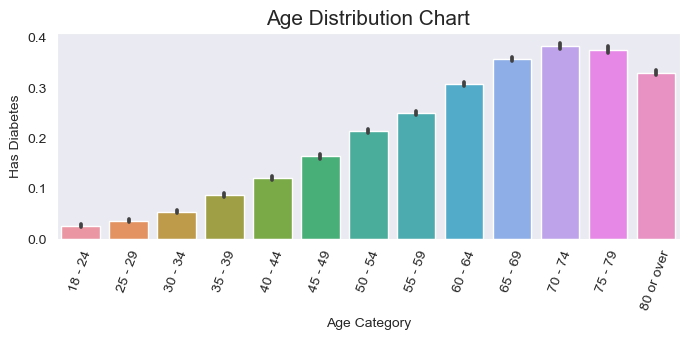

In [209]:
order_age = pd.value_counts(df['Age Category']).sort_index().index
sns.barplot(x='Age Category', y='Has Diabetes', data=df, order=order_age)
plt.title('Age Distribution Chart', size=15)
plt.xticks(rotation=70)
plt.tight_layout()

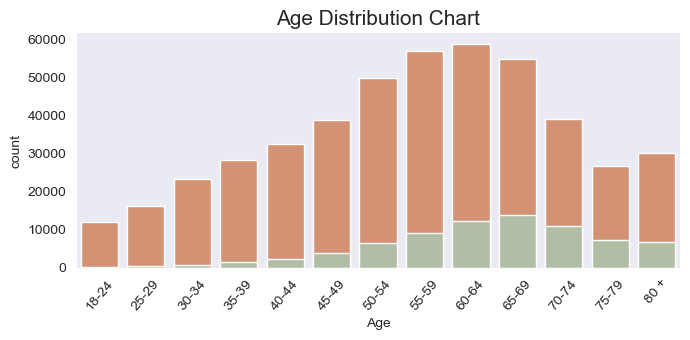

In [146]:
g = sns.countplot(x=(df[df['Has Diabetes']==False]['Age']), color='#e48c65', label='Does not have Diabetes')
sns.countplot(x=(df[df['Has Diabetes']==True]['Age']), color='#b2c1a2', label='Has Diabetes')
sns.despine()
plt.title('Age Distribution Chart', size=15)
g.set_xticklabels(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 +'])
plt.xticks(fontsize=10, rotation=50)
plt.tight_layout()

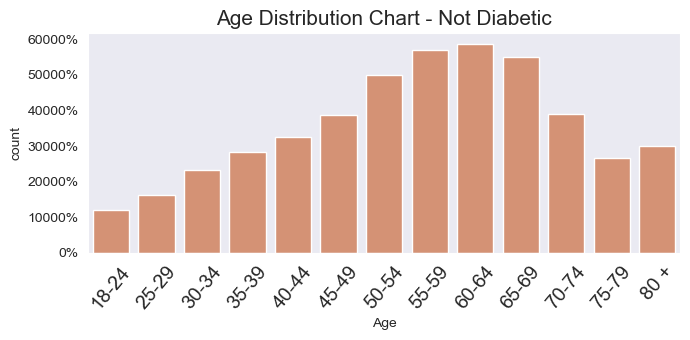

In [147]:

g = sns.countplot(x=(df[df['Has Diabetes']==False]['Age']), color='#e48c65')
g.set_xticklabels(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 +'])
plt.title('Age Distribution Chart - Not Diabetic', size=15)
g.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(fontsize=14, rotation=50)
plt.tight_layout()

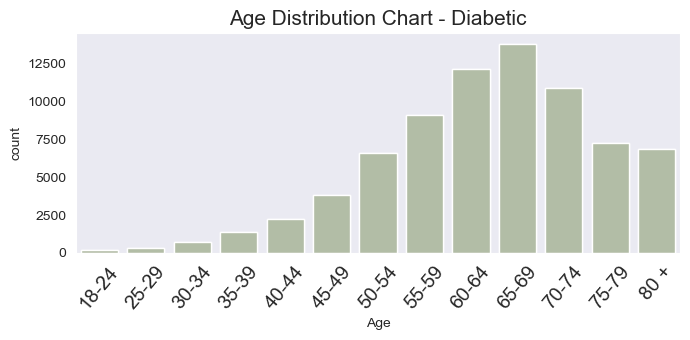

In [244]:

sns.countplot(x=(df[df['Has Diabetes']==True]['Age']), color='#b2c1a2', label='Has Diabetes')
g = sns.countplot(x=(df[df['Has Diabetes']==True]['Age']), color='#b2c1a2')
g.set_xticklabels(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 +'])
plt.title('Age Distribution Chart - Diabetic', size=15)
plt.xticks(fontsize=14, rotation=50)
plt.tight_layout()

Looking at these age distributions above, it seems that the Diabetic population has a large concentration in the older age ranges. This is evidenced by the larger percentages (of population) on the y label. This would agree with the general prevalence of diabetes amongst the older members of a population.

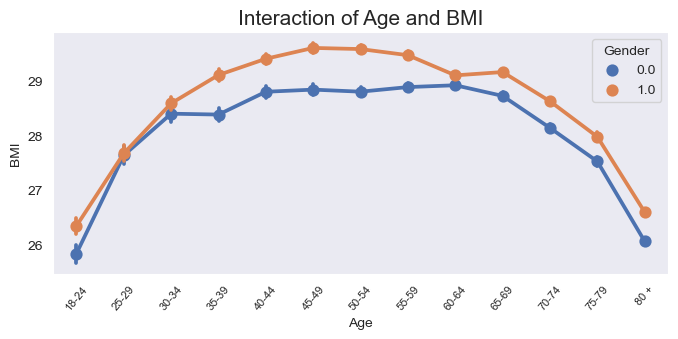

In [431]:
g = sns.pointplot(data=df, x='Age', y='BMI', hue='Gender', palette='deep')
plt.title('Interaction of Age and BMI', size=15)
g.set_xticklabels(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 +'])
plt.xticks(fontsize=8, rotation=50)
plt.show()

#### Creating a Gender Label column to fix the gender legend in the graph above 

In [433]:
df['Gender Label'] = df['Gender'].replace({1:'Female', 0: 'Male'}) 
# to fix legend

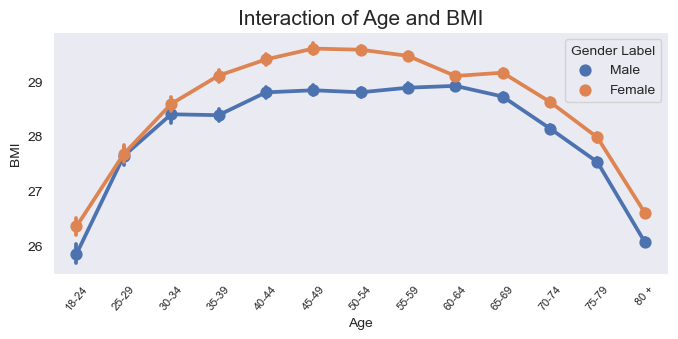

In [434]:
g = sns.pointplot(data=df, x='Age', y='BMI', hue='Gender Label', palette='deep')
plt.title('Interaction of Age and BMI', size=15)
g.set_xticklabels(['18-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79', '80 +'])
plt.xticks(fontsize=8, rotation=50)
plt.show()

In [435]:
# Creating new column Has Diabetes Label for hue='Has Diabetes Label' legend
df['Has Diabetes Label'] = df['Has Diabetes'].replace({2: 'Diabetic' ,1:'Pre-Diabetic', 0: 'Not Diabetic'}) # to fix legend

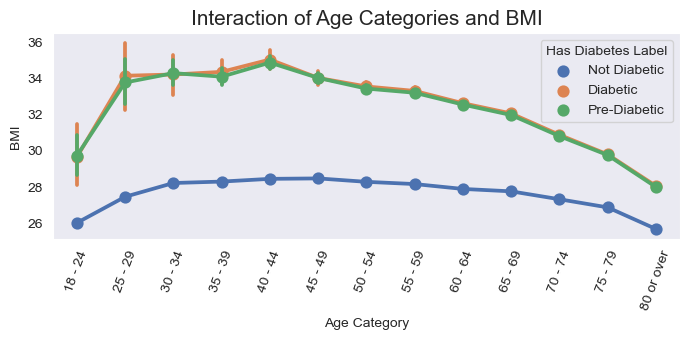

In [436]:
# Plotting for Age Categories and BMI and Instances of Diabetes
order_age = pd.value_counts(df['Age Category']).sort_index().index
sns.pointplot(x='Age Category', y='BMI', data=df, hue='Has Diabetes Label', order=order_age, palette='deep')

plt.xticks(rotation=70)
plt.tight_layout()
plt.title('Interaction of Age Categories and BMI', size=15)
plt.show()

##### To further analyse the data, I will complete the above analysis for lifestyle risks associated with diabetes.  The ones I am choosing are High Cholesterol, Smoking, BMI and High Blood Pressure

### Cholesterol

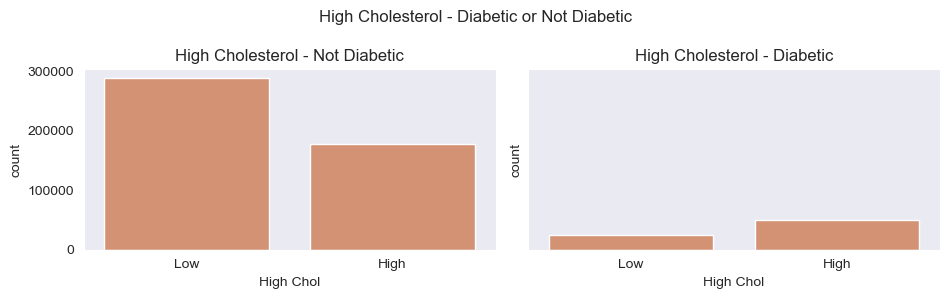

In [409]:
ratio=3
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), sharey=True) 
# When using ratio for fig size a clearer graph is created and time is saved sizing headings.
# Sharey=True allows an excellent side by side comparison on the same y axis
fig.suptitle('High Cholesterol - Diabetic or Not Diabetic')

ax1 = sns.countplot(x=(df[df['Has Diabetes']==False]['High Chol']), color='#e48c65', ax=ax1)
ax2 = sns.countplot(x=(df[df['Has Diabetes']==True]['High Chol']), color='#e48c65', ax=ax2)
ax1.set_xticklabels(['Low','High'])
ax2.set_xticklabels(['Low','High'])
ax1.set_title('High Cholesterol - Not Diabetic')
ax2.set_title('High Cholesterol - Diabetic')
plt.show()

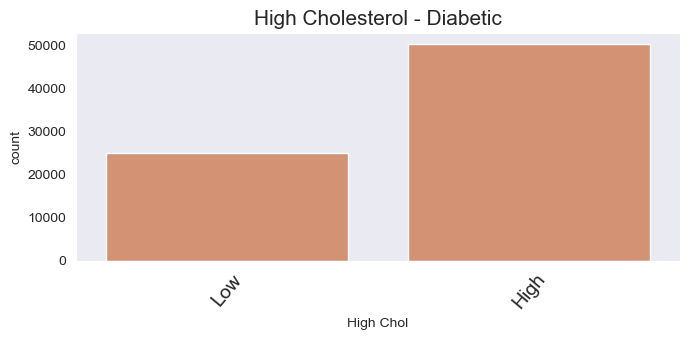

In [412]:
g = sns.countplot(x=(df[df['Has Diabetes']==True]['High Chol']), color='#e48c65')
g.set_xticklabels(['Low','High'])
plt.title('High Cholesterol - Diabetic', size=15)
plt.xticks(fontsize=14, rotation=50)
plt.tight_layout()

### Smoking

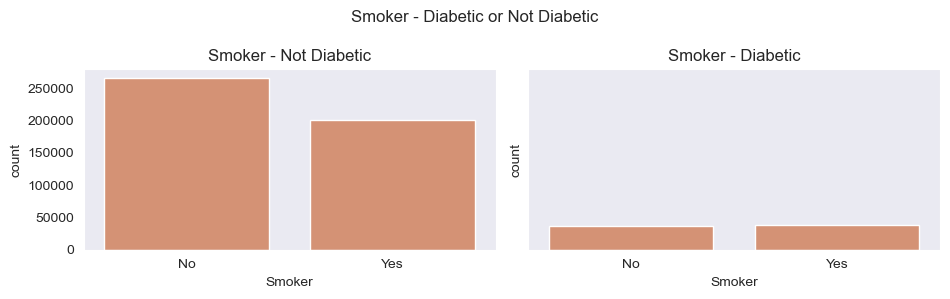

In [410]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), sharey=True) 
# When using ratio for fig size is produces a clearer graph and saves time sizing headings.
# sharey=True allows an excellent side by side comparison on the same y axis
fig.suptitle('Smoker - Diabetic or Not Diabetic')

ax1 = sns.countplot(x=(df[df['Has Diabetes']==False]['Smoker']), color='#e48c65', ax=ax1)
ax2 = sns.countplot(x=(df[df['Has Diabetes']==True]['Smoker']), color='#e48c65', ax=ax2)
ax1.set_xticklabels(['No','Yes'])
ax2.set_xticklabels(['No','Yes'])
ax1.set_title('Smoker - Not Diabetic')
ax2.set_title("Smoker - Diabetic")
plt.show()

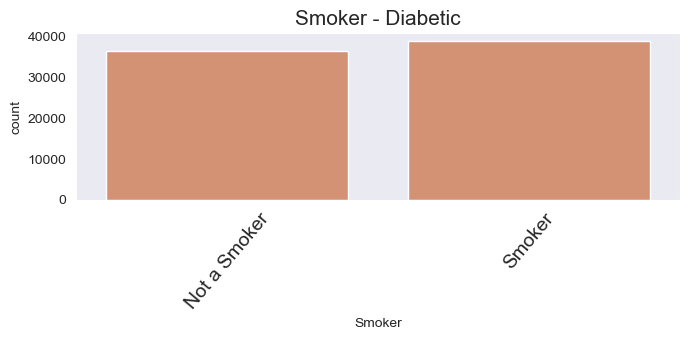

In [413]:
g = sns.countplot(x=(df[df['Has Diabetes']==True]['Smoker']), color='#e48c65')
g.set_xticklabels(['Not a Smoker','Smoker'])
plt.title('Smoker - Diabetic', size=15)
plt.xticks(fontsize=14, rotation=50)
plt.tight_layout()

### BMI

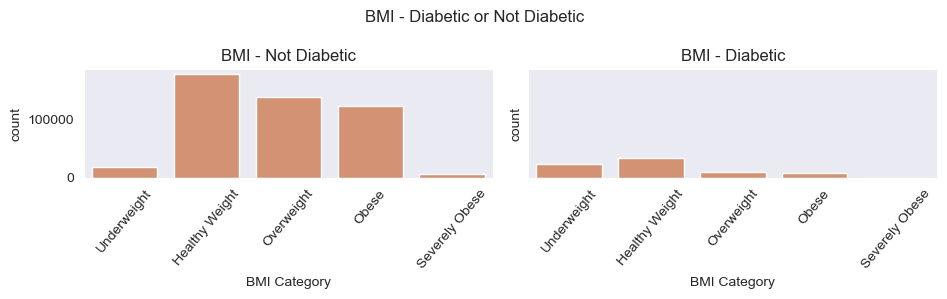

In [406]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), sharey=True) 
# When using ratio for fig size is produces a clearer graph and saves time sizing headings.
# sharey=True allows an excellent side by side comparison on the same y axis
fig.suptitle('BMI - Diabetic or Not Diabetic')

ax1 = sns.countplot(x=(df[df['Has Diabetes']==False]['BMI Category']), color='#e48c65', ax=ax1)
ax2 = sns.countplot(x=(df[df['Has Diabetes']==True]['BMI Category']), color='#e48c65', ax=ax2)
ax1.set_xticklabels(['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Severely Obese'], rotation=50)
ax2.set_xticklabels(['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Severely Obese'], rotation=50)
ax1.set_title('BMI - Not Diabetic')
ax2.set_title('BMI - Diabetic')
plt.show()

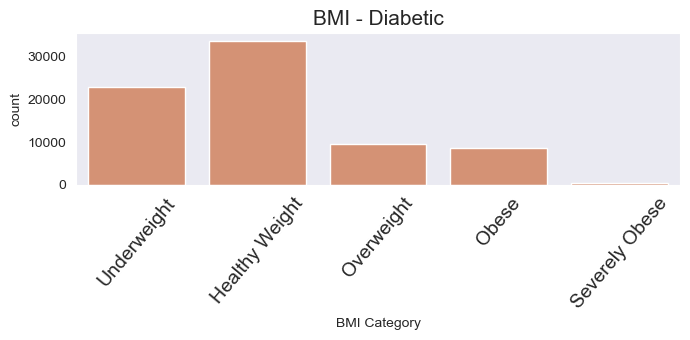

In [414]:
g = sns.countplot(x=(df[df['Has Diabetes']==True]['BMI Category']), color='#e48c65')
g.set_xticklabels(['Underweight', 'Healthy Weight', 'Overweight', 'Obese', 'Severely Obese'])
plt.title('BMI - Diabetic', size=15)
plt.xticks(fontsize=14, rotation=50)
plt.tight_layout()

### High Blood Pressure

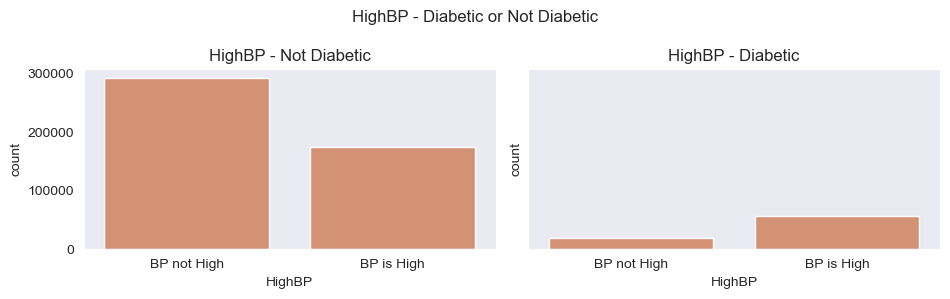

In [407]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), sharey=True) 
# When using ratio for fig size is produces a clearer graph and saves time sizing headings.
# sharey=True allows an excellent side by side comparison on the same y axis
fig.suptitle('HighBP - Diabetic or Not Diabetic')

ax1 = sns.countplot(x=(df[df['Has Diabetes']==False]['HighBP']), color='#e48c65', ax=ax1)
ax2 = sns.countplot(x=(df[df['Has Diabetes']==True]['HighBP']), color='#e48c65', ax=ax2)
ax1.set_xticklabels(['BP not High', 'BP is High'])
ax2.set_xticklabels(['BP not High', 'BP is High'])
ax1.set_title('HighBP - Not Diabetic')
ax2.set_title('HighBP - Diabetic')
plt.show()

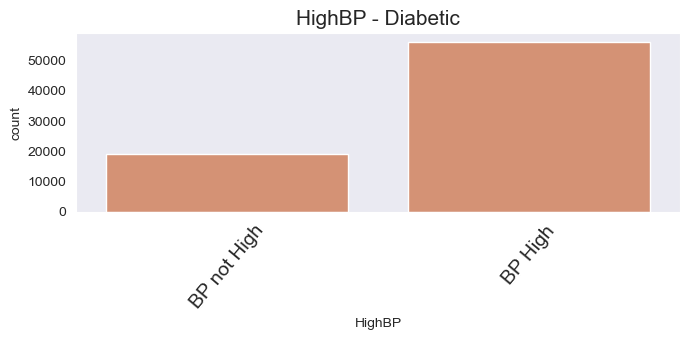

In [415]:
g = sns.countplot(x=(df[df['Has Diabetes']==True]['HighBP']), color='#e48c65')
g.set_xticklabels(['BP not High', 'BP High'])
plt.title('HighBP - Diabetic', size=15)
plt.xticks(fontsize=14, rotation=50)
plt.tight_layout()

### Sorting and Indexing examples
#### Sorting and indexing by Age and sorting by Age and BMI

In [157]:
age_df = df.sort_values('Age', ascending=False) # Sorting by Age descending
age_df.head(10)

,Has Diabetes,HighBP,High Chol,Recent Chol Check,BMI,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,...,Gen Health,Mental Health,Physical Health,Difficulty Walking,Gender,Age,Education,Income,BMI Category,Age Category
251452,2.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,0.0,13.0,4.0,3.0,Overweight,80 or over
533888,0.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,...,3.0,0.0,2.0,1.0,0.0,13.0,4.0,3.0,Healthy Weight,80 or over
30546,0.0,1.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,3.0,2.0,0.0,0.0,0.0,13.0,4.0,6.0,Healthy Weight,80 or over
101225,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,...,2.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0,Healthy Weight,80 or over
101232,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,...,2.0,0.0,0.0,0.0,0.0,13.0,4.0,5.0,Healthy Weight,80 or over
443608,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0,Overweight,80 or over
355838,1.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,3.0,0.0,0.0,0.0,1.0,13.0,6.0,7.0,Healthy Weight,80 or over
355839,0.0,0.0,0.0,1.0,29.0,0.0,1.0,0.0,1.0,1.0,...,2.0,0.0,0.0,1.0,0.0,13.0,6.0,5.0,Overweight,80 or over
101241,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,13.0,5.0,5.0,Overweight,80 or over
355841,0.0,1.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,13.0,6.0,8.0,Healthy Weight,80 or over


In [158]:
age_df = age_df.set_index('Age') # Setting Age as the index.

In [159]:
age_df.head(10) # Showing Age is the index

,Has Diabetes,HighBP,High Chol,Recent Chol Check,BMI,Smoker,Stroke,Heart Attack/Disease,Physically Active,Fruit Consump,...,Avoid Dr. Cost,Gen Health,Mental Health,Physical Health,Difficulty Walking,Gender,Education,Income,BMI Category,Age Category
Age,,,,,,,,,,,,,,,,,,,,,
13.0,2.0,1.0,1.0,1.0,25.0,0.0,0.0,0.0,0.0,1.0,...,0.0,4.0,0.0,0.0,0.0,0.0,4.0,3.0,Overweight,80 or over
13.0,0.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,2.0,1.0,0.0,4.0,3.0,Healthy Weight,80 or over
13.0,0.0,1.0,0.0,1.0,22.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,2.0,0.0,0.0,0.0,4.0,6.0,Healthy Weight,80 or over
13.0,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,6.0,6.0,Healthy Weight,80 or over
13.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,4.0,5.0,Healthy Weight,80 or over
13.0,0.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,5.0,4.0,Overweight,80 or over
13.0,1.0,1.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,6.0,7.0,Healthy Weight,80 or over
13.0,0.0,0.0,0.0,1.0,29.0,0.0,1.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,1.0,0.0,6.0,5.0,Overweight,80 or over
13.0,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,5.0,5.0,Overweight,80 or over


In [212]:
# Sorting by age and the BMI for chosen columns.
age_BMI_df = df.sort_values(['Age','BMI'], ascending=False)[['Age', 'BMI', 'Gen Health', 'Mental Health', 'Physical Health']]

age_BMI_df.head(10)

,Age,BMI,Gen Health,Mental Health,Physical Health
76532,13.0,98.0,2.0,0.0,0.0
400904,13.0,98.0,2.0,0.0,0.0
79338,13.0,92.0,2.0,0.0,0.0
79417,13.0,92.0,3.0,0.0,0.0
277325,13.0,92.0,2.0,0.0,0.0
299874,13.0,92.0,3.0,0.0,0.0
403710,13.0,92.0,2.0,0.0,0.0
403789,13.0,92.0,3.0,0.0,0.0
76313,13.0,87.0,2.0,0.0,0.0
76414,13.0,87.0,3.0,0.0,0.0


### Examining data with groupby function

In [166]:
pd.DataFrame(df.groupby(['Has Diabetes'])['HighBP'].value_counts())
# Shows counts for those with, for example, 2.0, Has Diabetes and 1.0 has HighBP = 26604. 

HighBP
Has Diabetes HighBP        
0.0          0.0     292618
             1.0     174765
1.0          1.0      56121
             0.0      19202
2.0          1.0      26604
             0.0       8742

In [228]:
pd.DataFrame(df.groupby(['Has Diabetes'])['HighBP'].sum())

,HighBP
Has Diabetes,
0.0,174765.0
1.0,56121.0
2.0,26604.0


In [229]:
df.groupby(['Has Diabetes'])['HighBP'].agg([np.min, np.max, np.mean, np.median])

,amin,amax,mean,median
Has Diabetes,,,,
0.0,0.0,1.0,0.373922,0.0
1.0,0.0,1.0,0.745071,1.0
2.0,0.0,1.0,0.752674,1.0


In [167]:
pd.DataFrame(df.groupby(['Has Diabetes'])['High Chol'].value_counts())

High Chol
Has Diabetes High Chol           
0.0          0.0           288971
             1.0           178412
1.0          1.0            50247
             0.0            25076
2.0          1.0            23686
             0.0            11660

In [230]:
pd.DataFrame(df.groupby(['Has Diabetes'])['High Chol'].sum())

,High Chol
Has Diabetes,
0.0,178412.0
1.0,50247.0
2.0,23686.0


In [168]:
df.groupby(['Has Diabetes'])['High Chol'].agg([np.min, np.max, np.mean, np.median])

,amin,amax,mean,median
Has Diabetes,,,,
0.0,0.0,1.0,0.381725,0.0
1.0,0.0,1.0,0.667087,1.0
2.0,0.0,1.0,0.670118,1.0


In [169]:
pd.DataFrame(df.groupby(['Has Diabetes'])['Smoker'].value_counts())

Smoker
Has Diabetes Smoker        
0.0          0.0     266172
             1.0     201211
1.0          1.0      38916
             0.0      36407
2.0          1.0      18317
             0.0      17029

In [170]:
pd.DataFrame(df.groupby(['Has Diabetes'])['Smoker'].sum())

,Smoker
Has Diabetes,
0.0,201211.0
1.0,38916.0
2.0,18317.0


In [231]:
df.groupby(['Has Diabetes'])['Smoker'].agg([np.min, np.max, np.mean, np.median])

,amin,amax,mean,median
Has Diabetes,,,,
0.0,0.0,1.0,0.430506,0.0
1.0,0.0,1.0,0.516655,1.0
2.0,0.0,1.0,0.518220,1.0


### Investigating Health variables and Diabetes. 

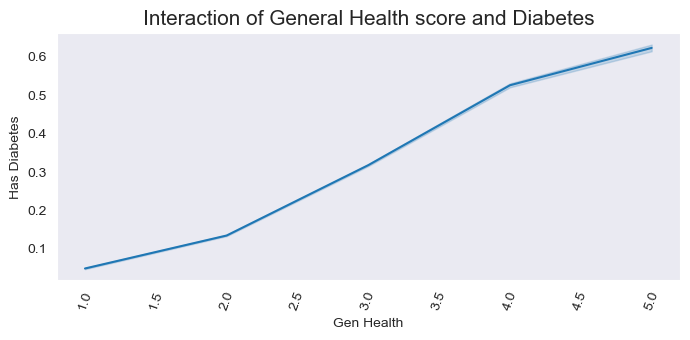

In [176]:
sns.lineplot(x='Gen Health', y='Has Diabetes', data=df, palette='deep')
plt.xticks(rotation=70)
plt.tight_layout()
plt.title('Interaction of General Health score and Diabetes', size=15)
plt.show()

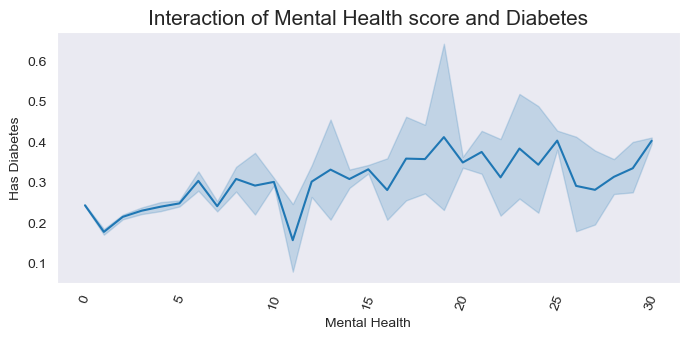

In [177]:
sns.lineplot(x= 'Mental Health', y='Has Diabetes', data=df, palette='deep')
plt.xticks(rotation=70)
plt.tight_layout()
plt.title('Interaction of Mental Health score and Diabetes', size=15)
plt.show()

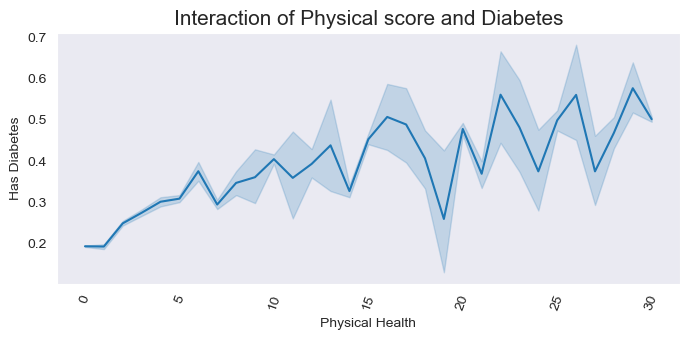

In [178]:
sns.lineplot(data=df, x='Physical Health', y='Has Diabetes', palette='deep')
#sns.lineplot(data=df, x='Physical Health', y='Has Diabeties', estimator=None, marker='o')
plt.xticks(rotation=70)
plt.tight_layout()
plt.title('Interaction of Physical score and Diabetes', size=15)
plt.show()

### Subsetting the dataframe

In [232]:
df.columns

Index(['Has Diabetes', 'HighBP', 'High Chol', 'Recent Chol Check', 'BMI',
       'Smoker', 'Stroke', 'Heart Attack/Disease', 'Physically Active',
       'Fruit Consump', 'Veg Consump', 'High Alcohol Consump',
       'Has Healthcare', 'Avoid Dr. Cost', 'Gen Health', 'Mental Health',
       'Physical Health', 'Difficulty Walking', 'Gender', 'Age', 'Education',
       'Income', 'BMI Category', 'Age Category'],
      dtype='object')

In [419]:
df_subset = df[['Has Diabetes', 'HighBP', 'High Chol', 'BMI',
       'Smoker', 'Stroke', 'Heart Attack/Disease']]

In [420]:
df_subset.shape

(578052, 7)

In [421]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578052 entries, 0 to 578051
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Has Diabetes          578052 non-null  float64
 1   HighBP                578052 non-null  float64
 2   High Chol             578052 non-null  float64
 3   BMI                   578052 non-null  float64
 4   Smoker                578052 non-null  float64
 5   Stroke                578052 non-null  float64
 6   Heart Attack/Disease  578052 non-null  float64
dtypes: float64(7)
memory usage: 30.9 MB


### Machine Learning

#### Create two arrays with General Health score and BMI as variables to predict poor health.

In [294]:
Health_array = df['Gen Health'].to_numpy()


In [297]:
print(Health_array)

[5. 3. 5. ... 1. 3. 2.]


In [295]:
BMI_array = df['BMI'].to_numpy()

In [298]:
print(BMI_array)

[40. 25. 28. ... 28. 23. 25.]


In [299]:
Age_array = df['Age'].to_numpy()

In [300]:
print(Age_array)

[9. 7. 9. ... 2. 7. 9.]


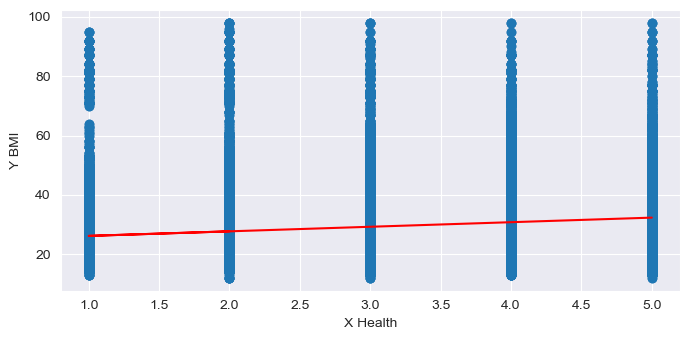

In [296]:
plt.scatter(Health_array, BMI_array)
plt.plot(Health_array, np.poly1d(np.polyfit(Health_array, BMI_array, 1))(Health_array), color='r')
plt.grid(True)
plt.xlabel('X Health')
plt.ylabel('Y BMI');
axis.grid(True)
plt.show()



### This model above shows an increase in BMI will coincide with an increase in poor health

### Computing and visualizing the normalized deviations of two arrays, Age and BMI.

Text(0, 0.5, 'Normalized Deviation of x and y')

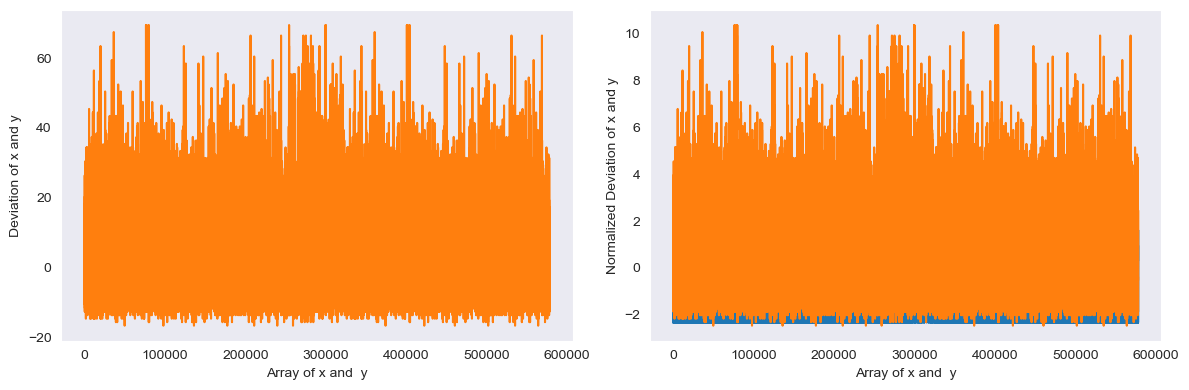

In [322]:
x = Age_array
y = BMI_array
# Compute the deviations by subtracting the mean offset
dx = x - np.mean(x)
dy = y - np.mean(y)

# Normalize the data by dividing the deviations by the standard deviation
zx = dx / np.std(x)
zy = dy / np.std(y)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(dx)
plt.plot(dy)
plt.xlabel('Array of x and  y')
plt.ylabel('Deviation of x and y')
plt.subplot(122)
plt.plot(zx)
plt.plot(zy)
plt.xlabel('Array of x and  y')
plt.ylabel('Normalized Deviation of x and y')

### Building linear models

Text(0, 0.5, 'Y')

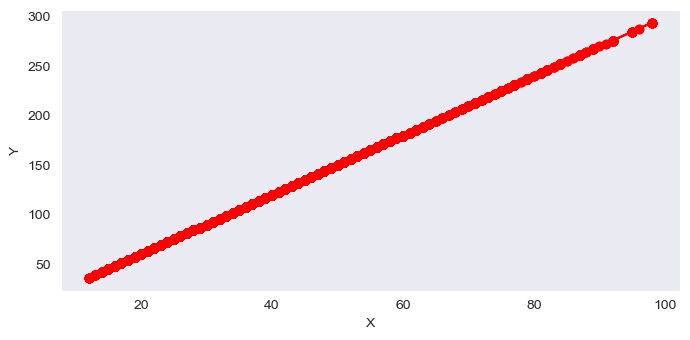

In [329]:
def model(x, a3=3, a2=0, a1=2):
    return x + a1*x + a2*x**2
# Generate array x, then predict ym values for specific, non-default a0 and a1
x = BMI_array
ym = model(x)

# Plot the results, ym versus x
plt.plot(x,ym, marker='o', color='r')
plt.xlabel('X')
plt.ylabel('Y')



Text(0, 0.5, 'Y')

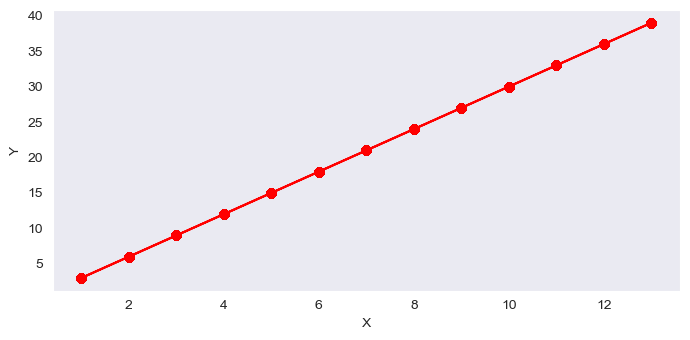

In [330]:
def model(x, a3=3, a2=0, a1=2):
    return x + a1*x + a2*x**2
# Generate array x, then predict ym values for specific, non-default a0 and a1
x = Age_array
ym = model(x)

# Plot the results, ym versus x
plt.plot(x,ym, marker='o', color='r')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

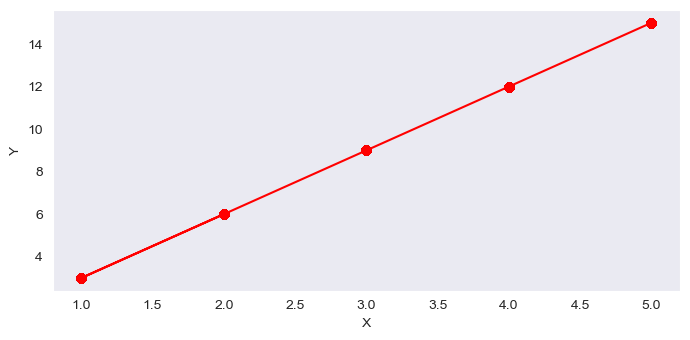

In [331]:
def model(x, a3=3, a2=0, a1=2):
    return x + a1*x + a2*x**2
# Generate array x, then predict ym values for specific, non-default a0 and a1
x = Health_array
ym = model(x)

# Plot the results, ym versus x
plt.plot(x,ym, marker='o', color='r')
plt.xlabel('X')
plt.ylabel('Y')

Text(0, 0.5, 'Y')

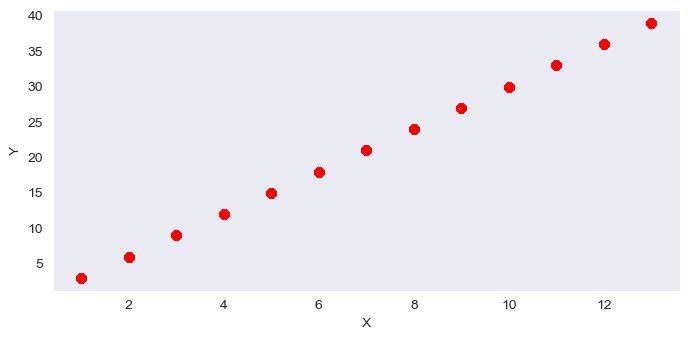

In [440]:
def model(x, a3=3, a2=0, a1=2):
    return x + a1*x + a2*x**2
# Generate array x, then predict ym values for specific, non-default a0 and a1
x = Age_array
ym = model(x)

# Plot the results, ym versus x
plt.scatter(x,ym, marker='o', color='r')
plt.xlabel('X')
plt.ylabel('Y')